In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree

from sklearn.metrics import (root_mean_squared_error,
                             accuracy_score)


# Task 1 #

Целевой признак popularity.

    Считайте данные через pandas

    Сделайте разбиение на обучение и тест с соотношением 80/20 и random_state=1.

    Обучите дерево решений для задачи на базовых параметрах с фиксированным random_state=1 и посчитайте метрику RMSE на тренировочной и тестовой выборках.

    Обучите случайный лес для задачи на базовых параметрах с фиксированным random_state=1 и посчитайте метрику RMSE на тренировочной и тестовой выборках.

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [2]:
data = pd.read_csv('./music_prepared.csv')
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


In [3]:
data.shape

(5000, 16)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=1)

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(X_train, y_train)

tree_mse_train = root_mean_squared_error(y_train , tree_reg.predict(X_train))
tree_mse_test = root_mean_squared_error(y_test , tree_reg.predict(X_test))
print(f'rmse дерева для тренирочоного/теста = {tree_mse_train:.3f}/{tree_mse_test:.3f}')


mse дерева для тренирочоного/теста = 4.501/29.990


In [ ]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(X_train, y_train)
forest_mse_train = root_mean_squared_error(y_train , forest_reg.predict(X_train))
forest_mse_test = root_mean_squared_error(y_test , forest_reg.predict(X_test))
print(f'rmse леса для тренирочоного/теста = {forest_mse_train:.3f}/{forest_mse_test:.3f}')

mse леса для тренирочоного/теста = 9.181/22.776


Answer 1:

In [7]:
print(tree_mse_test-forest_mse_test)

7.2137794461624765


# Task 2 #

Продолжайте работать с датасетом музыкальных композиций.

У модели случайный лес оставьте параметр random_state=1. Измените глубину деревьев от 1 до 50 с шагом 3.

Визуализируйте изменение ошибки RMSE на тренировочной и тестовой выборках от параметра глубины.

Выберите правильный вывод:

Выберите один ответ:

    Увеличение до разумных пределов параметра max_depth в случайном лесу ухудшает качество модели

    Параметр max_depth не влияет на качество случайного леса

    Увеличение до разумных пределов параметра max_depth в случайном лесу улучшает качество модели 

трен/тест: 27.739964214326466/28.423178535774095
трен/тест: 25.88957932415597/26.92744116777383
трен/тест: 22.414372793563878/25.09489381422921
трен/тест: 17.331512708230484/23.472832490702253
трен/тест: 12.881123997631937/22.86853230126138
трен/тест: 10.460286725679994/22.8123492607095
трен/тест: 9.540142790696363/22.770908779637114
трен/тест: 9.289770384406573/22.727953211233004
трен/тест: 9.209104584150818/22.765200148267606
трен/тест: 9.179453252988434/22.73740443901832
трен/тест: 9.175711037367138/22.75810244165109
трен/тест: 9.178855631749856/22.77211122176202
трен/тест: 9.181086673947888/22.775863029124782
трен/тест: 9.181086673947888/22.775863029124782
трен/тест: 9.181086673947888/22.775863029124782
трен/тест: 9.181086673947888/22.775863029124782
трен/тест: 9.181086673947888/22.775863029124785


Text(0.5, 0, 'depth')

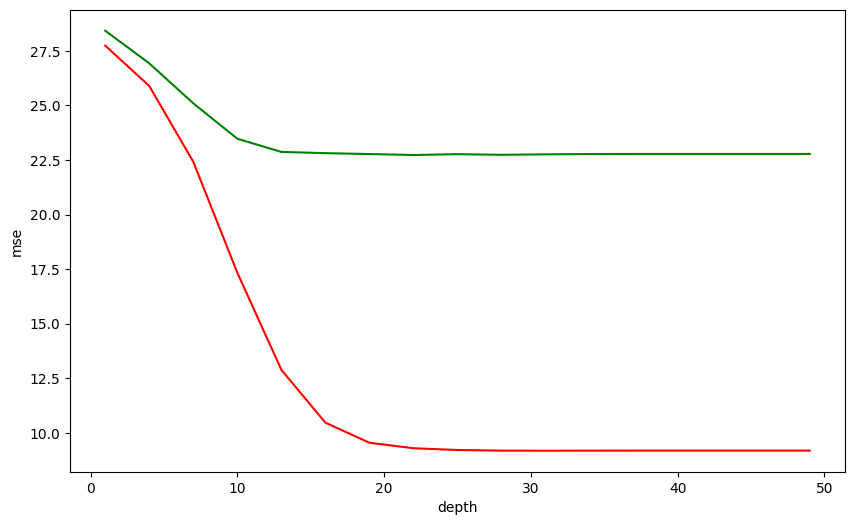

In [8]:
depth_range = range(1, 51, 3)

mse_train_list22 = []
mse_test_list22 = []

for depth in depth_range:
    regressor = RandomForestRegressor(random_state=1, max_depth=depth, n_jobs=-1)
    regressor.fit(X_train, y_train)

    mse_train22 = root_mean_squared_error(y_train , regressor.predict(X_train))
    mse_test22 = root_mean_squared_error(y_test , regressor.predict(X_test))
    mse_train_list22.append(mse_train22)
    mse_test_list22.append(mse_test22)

    print(f'трен/тест: {mse_train22}/{mse_test22}')


plt.figure(figsize=(10,6))
plt.plot(depth_range, mse_train_list22, color='red')
plt.plot(depth_range, mse_test_list22, color='green')
plt.ylabel('mse')
plt.xlabel('depth')

Answer 2:

    Увеличение до разумных пределов параметра max_depth в случайном лесу улучшает качество модели

# Task 3 #

Продолжайте работать с датасетом музыкальных композиций.


Давайте снова перейдем к задаче бинарной классификации (популярная песня/не популярная песня), для этого нужно перевести целевой признак popularity в бинарный вид:

Если признак popularity больше 50 - 1 класс

Если признак popularity меньше или равен 50 - 0 класс

Работайте с выборками после разбиения на обучение и тест

    Обучите дерево решений для задачи бинарной классификации с фиксированным random_state=1 и со значением глубины дерева 17.

    Посчитайте метрику accuracy на тренировочной и тестовой выборках.

    Обучите случайный лес для задачи на базовых параметрах с фиксированным `random_state=1`.

    Посчитайте метрику accuracy на тренировочной и тестовой выборках.

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [9]:
y_train_bin = (y_train > 50).astype(int)
y_test_bin = (y_test > 50).astype(int)

In [10]:
tree_clf = DecisionTreeClassifier(random_state=1, max_depth=17)
tree_clf.fit(X_train, y_train_bin)

tree_acc_train = accuracy_score(y_train_bin, tree_clf.predict(X_train))
tree_acc_test = accuracy_score(y_test_bin, tree_clf.predict(X_test))

print(f'трен/тест: {tree_acc_train}/{tree_acc_test}')


трен/тест: 0.98075/0.689


In [11]:
forest_clf = RandomForestClassifier(random_state=1)
forest_clf.fit(X_train, y_train_bin)

forest_acc_train = accuracy_score(y_train_bin, forest_clf.predict(X_train))
forest_acc_test = accuracy_score(y_test_bin, forest_clf.predict(X_test))

print(f'трен/тест: {forest_acc_train}/{forest_acc_test}')


трен/тест: 0.9935/0.771


Answer 3:

In [12]:
forest_acc_test - tree_acc_test

0.08200000000000007

# Task 4 #

Продолжайте работать с датасетом музыкальных композиций.


    У модели случайный лес оставьте параметр random_state=1. Измените количество деревьев от 1 до 150 с шагом 10.

    Визуализируйте изменение метрики accuracy на тренировочной и тестовой выборках от параметра количества моделей.

Выберите правильный вывод:
Выберите один ответ:

    Увеличение до разумных пределов параметра n_estimators в случайном лесу ухудшает качество модели

    Увеличение до разумных пределов параметра n_estimators в случайном лесу улучшает качество модели 
    
    Параметр n_estimators не влияет на качество случайного леса

0.864 / 0.647
0.987 / 0.728
0.9925 / 0.758
0.99275 / 0.76
0.99325 / 0.758
0.99325 / 0.765
0.9935 / 0.765
0.9935 / 0.758
0.9935 / 0.758
0.9935 / 0.763
0.9935 / 0.768
0.9935 / 0.769
0.9935 / 0.771
0.9935 / 0.765
0.9935 / 0.765


Text(0.5, 0, 'num_trees')

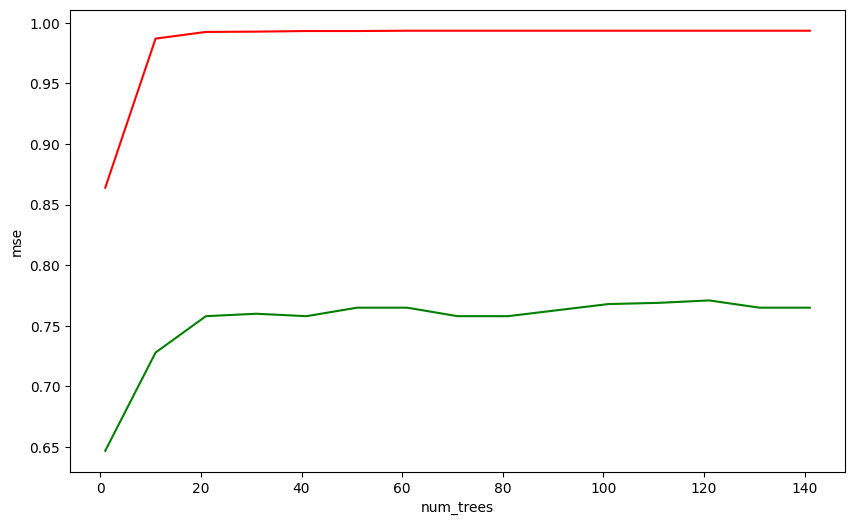

In [13]:
num_trees = range(1, 151, 10)

train_acc_list = []
test_acc_list = []

for num in num_trees:
    clf4  = RandomForestClassifier(random_state=1, n_estimators=num, n_jobs=-1)
    clf4.fit(X_train, y_train_bin)

    print(f'{accuracy_score(y_train_bin, clf4.predict(X_train))} / {accuracy_score(y_test_bin, clf4.predict(X_test))}')
    train_acc_list.append(accuracy_score(y_train_bin, clf4.predict(X_train)))
    test_acc_list.append(accuracy_score(y_test_bin, clf4.predict(X_test)))


plt.figure(figsize=(10,6))
plt.plot(num_trees, train_acc_list, color='red')
plt.plot(num_trees, test_acc_list, color='green')
plt.ylabel('mse')
plt.xlabel('num_trees')   

Answer 4

    Увеличение до разумных пределов параметра n_estimators в случайном лесу улучшает качество модели